In [4]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop columns with many missing values
df = df.drop(columns=['id', 'dataset', 'num', 'slope', 'ca', 'thal'])

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Apply preprocessing and split
X_processed = preprocessor.fit_transform(X)

# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_processed, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

print("🔍 Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Ensemble Accuracy: 0.8478260869565217


<ipython-input-6-7290ca9610bd>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


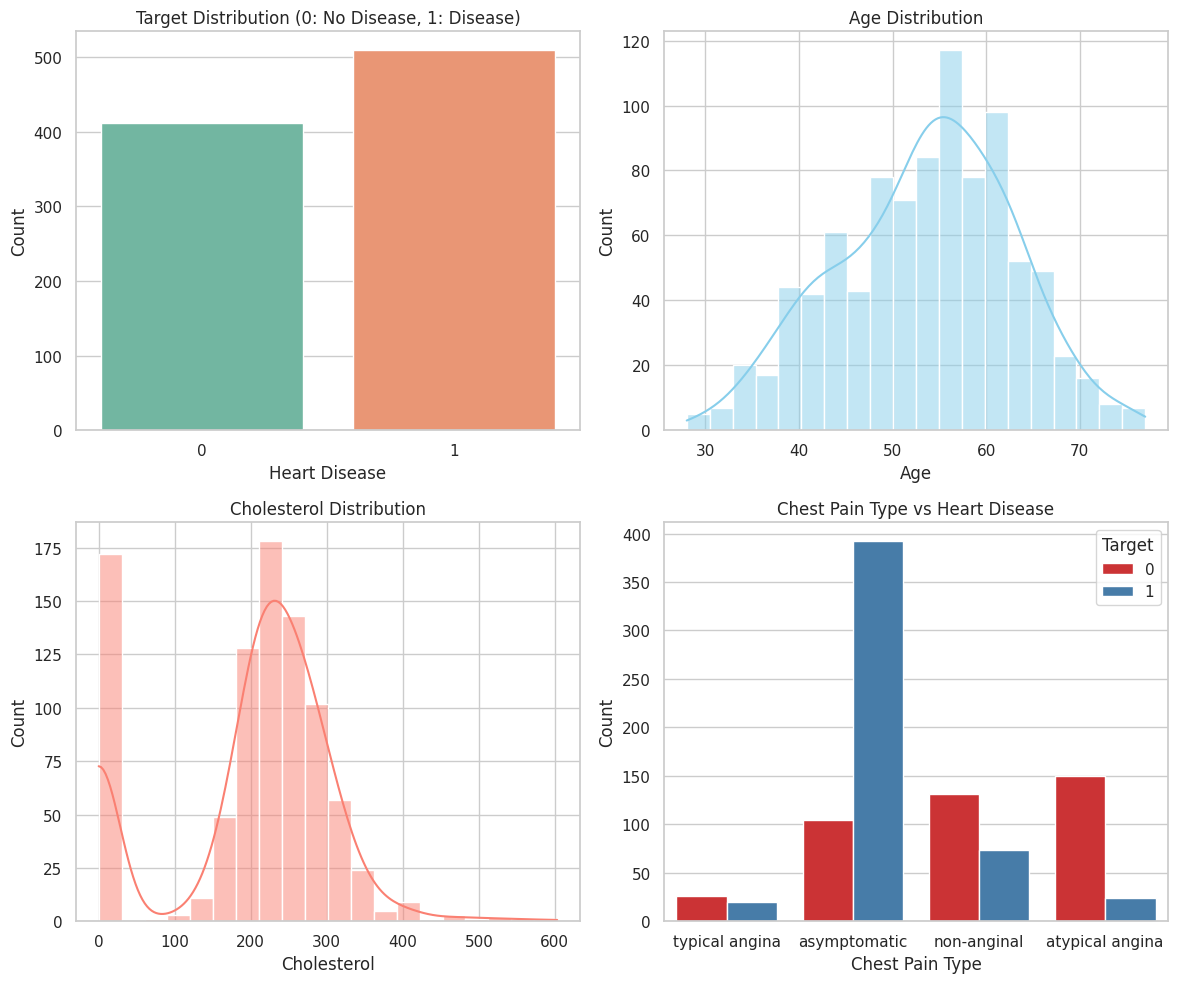

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:18:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Accuracy: 79.41 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        95
           1       0.85      0.75      0.80       109

    accuracy                           0.79       204
   macro avg       0.80      0.80      0.79       204
weighted avg       0.80      0.79      0.79       204


🧮 Confusion Matrix:
 [[80 15]
 [27 82]]


In [6]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# -------------------- 📊 Exploratory Data Analysis --------------------
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 10))

# 1. Target Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Target Distribution (0: No Disease, 1: Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# 2. Age Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='age', kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

# 3. Cholesterol Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='chol', kde=True, bins=20, color='salmon')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')

# 4. Chest Pain Type vs Target
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='cp', hue='target', palette='Set1')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target')

plt.tight_layout()
plt.show()

# -------------------- 🧹 Data Preprocessing --------------------

# Drop columns with many missing values or unnecessary identifiers
df = df.drop(columns=['id', 'dataset', 'num', 'slope', 'ca', 'thal'])

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# -------------------- ⚖️ Handle Imbalance with SMOTE --------------------
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_processed, y)

# -------------------- 🔀 Train-Test Split --------------------
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# -------------------- 🚀 Train XGBoost Model --------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# -------------------- ✅ Evaluation --------------------
y_pred = xgb_model.predict(X_test)

print("🔍 Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
